# Most Popular Topics in Data Science - Part 1

In the first portion of this project, I explore the <a href="https://datascience.stackexchange.com/">Data Science</a> page on Stack Exchange in order to determine which data science topics are most relevant to the field of data science. Since data science is a fairly new scientific discipline, it is rapidly changing and thus it is paramount that students studying the field focus their efforts on the most applicable subfields.

## 1. Exploring Stack Exchange

Before reading in any datasets or taking a look at data, I will examine the Stack Exchange website to determine if I can obtain any information that will be useful for my analysis. In this section, I will investigate both the home page and the Data Science subpage.

### a) Home Page

Stack Exchange provides high-quality answers on a myriad of different topics. In order to ensure the quality of the site's answer, the site requests that users abide by the following guidelines in regards to asking and answering questions:
- No chit chat. All answers and responses must be relevant to the topic being discussed.
- Users can vote on the answers provided, and the most highly-rated answers will show up first.
- The user who asked the question can mark one answer as accepted. This does not mean that this answer is the best answer to the question, but rather the most useful (or most timely) answer to the original questioner.
- Users should avoid asking questions that are opinion-based, have multiple possible answers, or would require a lengthy answer.

The site's guidelines make it an ideal location for tech workers looking for professional answers. Next, I will examine the Data Science Stack Exchange so that I will be able to more easily navigate the data when the time comes.

### b) Data Science Stack Exchange (DSSE)

There are five sections on the DSSE page:
- **Questions** = list of total questions asked and answers to those said questions.
- **Tags** = list of keywords that categorize similar questions by subject matter. As of November 13, 2020, the ten most popular tags on the DSSE are:
    - *machine-learning* = methods and principles of building "computer systems that automatically improve with experience."
    - *python* = use for data science questions related to the programming language Python.
    - *neural-network* = composed of 'neurons' - programming constructs that mimic the properties of biological neurons.
    - *deep-learning* = a new area of Machine Learning research concerned with the technologies used for learning hierarchical representations of data.
    - *classification* = an instance of supervised learning that identifies the category or categories which a new instance of dataset belongs.
    - *keras* = a minimalist, highly modular neural network library written in Python.
    - *scikit-learn* = a Python module comprising of simple and efficient tool for machine learning, data mining and data analysis.
    - *tensorflow* = an open source library for machine learning and machine intelligence.
    - *nlp* = a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and humans.
    - *r* = a free, open-source programming language and software environment for statistical computing, bioinformatics, and graphics.
- **Users** = list of users and their ratings
- **Unanswered** = list of all questions that have been yet to be answered
- **Jobs** = link to job listings for developers

The only section that looks promising for my investigation is the tags section as it helps users determine what type of knowledge is required to answer the DSSE questions. In the next section, I will use the Stack Exchange Data Explorer to further examine the Tags section.

## 2. Determining What Data to Analyze

In this section, I will use <a href="https://data.stackexchange.com/datascience/query/new">Stack Exchange Data Explorer</a> to help examine each dataset table for usefulness. I will write SQL queries to extract relevant data from these tables and then extract the data into a csv file so I can edit it using pandas.

After exploring the table names and elements, the most relevant tables appear to be Posts and Tags, so I will examine both in greater detail. Since I'm writing all of my SQL queries in Stack Exchange Data Explorer instead of in Jupyter Notebook, I will type all the SQL queries I wrote in Stack Exchange Data Explorer into a Raw NBConvert cell so that it won't cause an error. Additionally, I will take screenshots of the tables that my SQL queries returned. Note that I spent a significant time on Stack Exchange Data Explorer writing queries in order to figure out which tables were relevant, and therefore the queries displayed here are my "final drafts".

### a) Posts Table

First, I will list the top ten rows of the Post table (with the highest number of views) that meet the following conditions:
- Questions = I am interested in examining posts that are questions about data science topics. This is more useful than examining answers, as certain types of questions (such as popular ones or those that are easiest to answer) might receive more answers than others.
- Posted in 2020 = Since data science is a rapidly changing field, the most relevant subjects of five years ago might not to be the most relevant topics of today. Therefore, I will only by examining posts from 2020.
- Over 100 views = The number of views a question receives is likely positively correlated with the relevancy of the question to other users of Stack Exchange. Thus, questions with very few views won't be examined.
- At least one answer = Questions could lack an answer for a variety of reasons, two of which are irrelevancy and the inability of users to answer the question. To help reduce the number questions I examine with at least one of these attributes, I will only examine questions with at least one answer.

<img src="Photos/Posts.png">

This table looks very promising. I could use this table in order to figure out which tags are used most often, which tags have the most views, and which tags are often used in conjunction with on another.

### b) Tags Table

Next, I will list the top ten rows of the Tags table with the highest count. 

<img src="Photos/Tags.png">

This table would be much more useful if it contained the dates in which these tags were created. Because it does not include this information, I cannot verify these tags remain popular today. Therefore, I will rely on data from the Posts table as in contains the most pertinent data.

### c) Importing the Data

Finally, I downloaded the csv file of the table created by the SQL query displayed in the Posts subsection (the version I downloaded has all rows listed, rather than just the first 10 rows) and saved it as questions_2020.csv. Below, I will import the appropriate libraries and read the csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

questions = pd.read_csv("questions_2020.csv")
questions

,Id,Score,ViewCount,Tags,AnswerCount
0,68654,-1,15384,<python><pandas><data-cleaning>,1
1,66590,1,11254,<r><visualization><ggplot2>,1
2,66748,1,8144,<tensorflow>,4
3,66350,33,6728,<machine-learning-model><training><supervised-...,7
4,76824,25,6242,<machine-learning><python><r><statistics><data...,7
...,...,...,...,...,...
792,77172,2,101,<regression><predictive-modeling><forecasting>...,1
793,75461,0,101,<deep-learning><keras><ensemble-modeling>,1
794,67225,1,101,<machine-learning><tensorflow><convolution>,1
795,78489,0,101,<python><neural-network><scikit-learn><mlp>,2


Now that I have determined which data I will be working with, I can begin analyzing.

## 3. Determining the Relevancy of Each DSSE Tag


There are two metrics that I will use to determine the relevancy of a tag:
- Number of tags = number of times a tag was attached to a question (indicates more projects requiring this skill)
- Number of views = total number of views each tag received in all posts (indicates more people found the question relevant)

In order to determine how relevant each DSSE tag is to the field of data science, I will parse through the "Tags" column in the questions dataset and create two dictionaries. The first will contain the total number of questions that involve the data science topic. The second will contain the total number of views all questions that involved the data science topic received.

### a) Creating Tables that Show Relevancy

The two dictionaries I create will be used to gather data from the "Tags" column in the questions_2020 dataset. The first dictionary will contain the total numbers of times each tag was used while the second will contain the total number of views each tag received.

In [2]:
count_tag = {}
views_tag = {}
count = 0

for row in questions["Tags"]:
    # Transforms the conjoined tags into a list of individual tags
    tags = row.replace("><", " ").replace("<", "").replace(">", "").split(" ")
    for tag in tags:
        if tag in count_tag:
            count_tag[tag] += 1
            views_tag[tag] += questions["ViewCount"].iloc[count]
        else:
            count_tag[tag] = 1
            views_tag[tag] = questions["ViewCount"].iloc[count]
    count += 1

Next, I will convert both dictionaries into pandas dataframes so they can be concatonated. This will enable me to  create a table that neatly summarizes all relevant information.

In [3]:
# Convert each dictionary to a dataframe
tags = pd.DataFrame.from_dict(count_tag, orient="index")
views = pd.DataFrame.from_dict(views_tag, orient="index")

# Rename the columns of each dataframe
tags.rename(columns={0: "Count"}, inplace=True)
views.rename(columns={0: "Views"}, inplace=True)

# Order the dataframes by their respective metric
tag_count = tags.sort_values(by="Count", ascending=False)
tag_views = views.sort_values(by="Views", ascending=False)

In [4]:
# Concatonate dataframes and sort values by number of tags
tag_metrics = pd.concat([tag_count, tag_views], axis=1)
tag_metrics = tag_metrics.sort_values(by="Count", ascending=False)
tag_metrics

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Count,Views
machine-learning,263,104873
python,202,120591
deep-learning,107,45476
scikit-learn,91,41802
keras,91,74376
...,...,...
aws,1,115
information-theory,1,176
pooling,1,1294
json,1,161


As seen above, the most frequently used data science topics don't necessarily have the highest number of total views. For example, questions about machine-learning were asked more frequently than those about python, but questions about python received the more total views.

### b) Bar Chart that Demonstrates Tag Relevancy

Next, I will organize the data so I can easily create a bar chart that contains the top ten data science topics for each of the two metrics.

In [5]:
tag_names = list(tag_count.index) # Names of tags

In [6]:
# Frequecies of the tags
tag_values = []
for name in tag_names:
    tag_values.append(count_tag[name])

In [7]:
# Views of the tags
view_values = []
for name in tag_names:
    view_values.append(views_tag[name])

Before creating my bar chart, I will create an autolabel function that places the value of each individual bar above the bar itself. For example, if a given tag has 55 total instances, the bar showing that tag will have a number 55 above it. This will eliminate the need for axis labels, which will make the chart look cleaner.

In [8]:
def autolabel(bars, ax):
    for bar in bars:
        height = bar.get_height()
        if height >= 1000:
            new_height = str(round((height / 1000.0), 1)) + "K"
        else:
            new_height = str(height)
        
        ax.annotate(new_height,
                    xy=(bar.get_x() + bar.get_width() / 2, height), # XY position for placing text
                    xytext=(0, 3),  # Places percentage 3 points vertically
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=15)

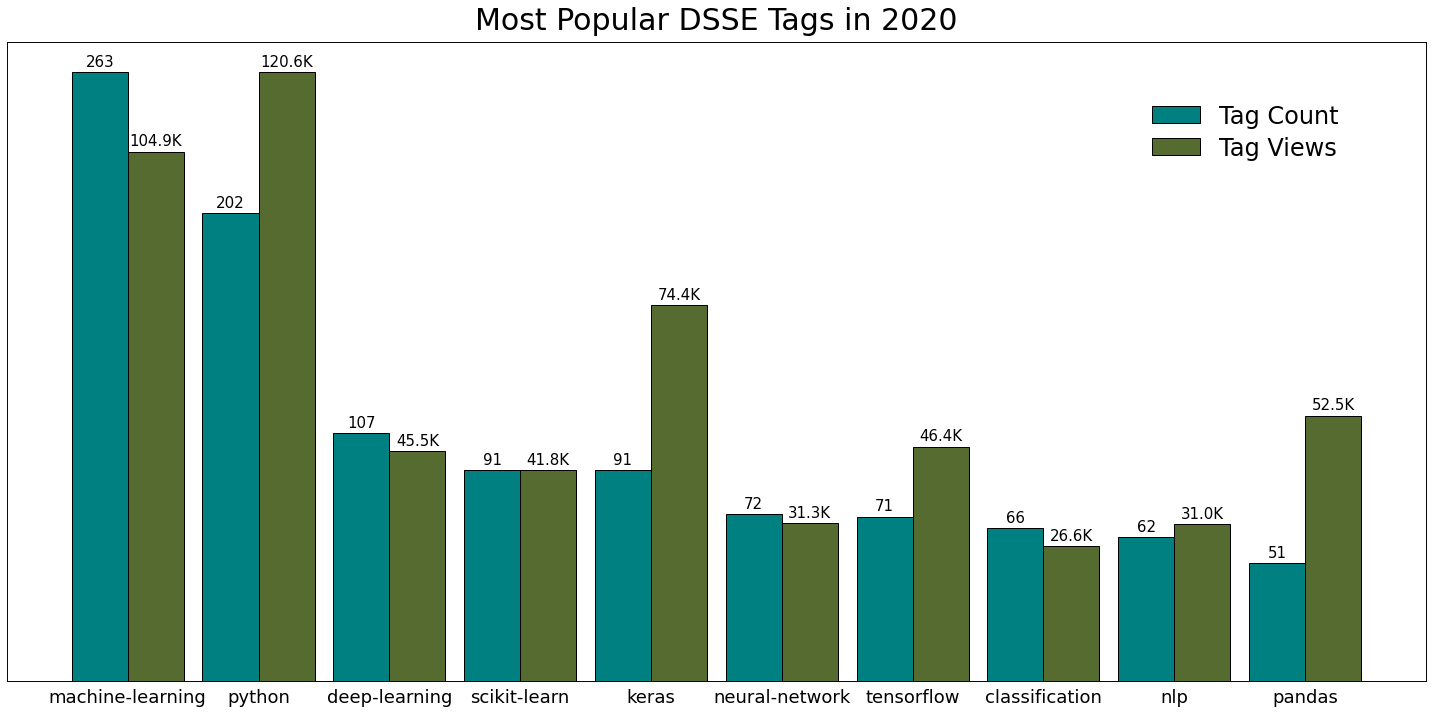

In [9]:
ind = np.arange(10)
width=(3/7)

fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()

tags = ax1.bar(ind-width/2, tag_values[:10], width, color='teal', edgecolor="black", label="Tag Count")
views = ax2.bar(ind + width/2, view_values[:10], width, color='DarkOliveGreen', edgecolor="black", label="Tag Views") 

ax1.set_xticks(ind)
ax1.set_title('Most Popular DSSE Tags in 2020', fontsize=30, y=1.01)
ax1.set_xticklabels(tag_names[:10], fontsize=18)

ax1.tick_params(axis="both", which="both", top=False, bottom=False, left=False, labelleft=False)
ax2.tick_params(axis="both", which="both", top=False, bottom=False, right=False, left=False, labelright=False)

ax1.legend(loc=(0.8, 0.85), fontsize=24, frameon=False)
ax2.legend(loc=(0.8, 0.8), fontsize=24, frameon=False)

autolabel(tags, ax1)
autolabel(views, ax2)

fig.tight_layout()
plt.show()

While there is a strong positive correlation between the number of instances of a tag and that tag's total number of views, this relationship is not perfect. Therefore, it is very difficult to rank the data science topics. For example, while the pandas tag only has the 10th most instances, it has the 4th most total views. In the next section, I will develop a ranking system that weighs both metrics equally and then recreate this diagram using this new ranking system.

## 4. Adjusting the Ranking System

Which topic is the most relevant, machine-learning or python? While the machine-learning tag has been used on 51 more questions than the python tag has, the python tag has over 15K more total views than the machine-learning tag does. This makes it rather difficult to determine which subfield is more relevant. To determine this, I will create a ranking system based on a combination of the distributions of both tag count and total number of views.

### a) Developing the Ranking System

To create this new distribution, I will need to do the following:
1. Calculate the mean and standard deviation of both metrics
2. Convert each of the metric's distributions into a normal distribution (find the z-score for each value)
3. Add the two normalalized distributions togther and use those values as the score
4. Adjust the score (using scalars and constants) so the minimum score is 0 and the maximum value is 100

The distributions of tag count and tag views are on very different scales, with the former being on a scale from 1 to 263 and the later being on a scale from 101 to 120591. However, by normalizing both distributions, both distributions will have a mean of 0 and a standard deviation of 1, thus making them comparable.

First, I will calculate the mean and standard deviations of both metrics and then normalize both distributions.

In [10]:
count_mean = tag_count.mean()
count_std = tag_count.std(ddof=1)

views_mean = tag_views.mean()
views_std = tag_views.std(ddof=1)

z_count = {}

for key, value in count_tag.items():
    z_count[key] = round(((value - count_mean) / count_std)[0], 2)

z_views = {}

for key, value in views_tag.items():
    z_views[key] = round(((value - views_mean) / views_std)[0], 2)

Second, I will convert both dictionaries into a pandas dataframe so that they are easier to view as a table.

In [11]:
z_count2 = pd.DataFrame.from_dict(z_count, orient="index")
z_views2 = pd.DataFrame.from_dict(z_views, orient="index")

To ensure I properly normalized each distribution, I will check to see if both distributions have a mean close to 0 as well as a standard deviation close to 1.

In [12]:
print(z_count2.mean(), z_count2.std(ddof=1))
print("\n")
print(z_views2.mean(), z_views2.std(ddof=1))

0    0.000575
dtype: float64 0    0.999803
dtype: float64


0   -0.000415
dtype: float64 0    1.000058
dtype: float64


As seen above, the mean and standard deviations for both normalized distributions are roughly zero and one respectively and thus the two distributions are comparable. The discrepancy between the expected mean/standard deviation and the values above is due to imprecise rounding.

Next, I will combine the two distributions and convert the new distribution into a dataframe.

In [13]:
z_total = {}

for key in z_count:
    z_total[key] = round(z_count[key] + z_views[key], 2)

In [14]:
z_total2 = pd.DataFrame.from_dict(z_total, orient="index")
z_total2.sort_values(by=0, ascending=False)

,0
machine-learning,19.80
python,18.43
keras,9.58
deep-learning,7.84
scikit-learn,6.82
...,...
bioinformatics,-0.71
text-filter,-0.71
text-generation,-0.71
game,-0.71


For aesthetic purposes, I will adjust the distribution to that it is on a scale from 0 to 100. The function I will create in order to do so will complete the following steps:
- Subtract each value in the distribution by the minimum (-0.71 in this example) so that the minimum value is 0
- Multiple every value by the value of (100 / maximum value) so that the maximum value will become 100
- Sort the values in the new distribution by descending order

This function will return a distribution with values ranging from 0 to 100 without significantly changing the magnitude of the individual scores in relation to one another.

In [15]:
def scalar_distribution(dist):
    new_dist = dist - dist.min()
    return round(new_dist*(100/new_dist.max()), 2).sort_values(by=0, ascending=False)

In [16]:
z_total = scalar_distribution(z_total2)
z_total

,0
machine-learning,100.00
python,93.32
keras,50.17
deep-learning,41.69
scikit-learn,36.71
...,...
bioinformatics,0.00
text-filter,0.00
text-generation,0.00
game,0.00


I will repeat the same process for the z_count2 and z_views2 distributions. Then I will concatonate the three scores together so I can easily compare the top ten values in each distribution.

In [17]:
z_count = scalar_distribution(z_count2)
z_views = scalar_distribution(z_views2)

In [18]:
new_score = pd.concat([z_count, z_views, z_total], axis=1)
new_score.columns = ["Count Score", "Views Score", 'Total Score']
new_score = new_score.sort_values(by="Total Score", ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
new_score.head(10)

,Count Score,Views Score,Total Score
machine-learning,100.00,86.99,100.00
python,76.76,100.00,93.32
keras,34.34,61.64,50.17
deep-learning,40.45,37.67,41.69
scikit-learn,34.34,34.64,36.71
tensorflow,26.68,38.45,34.28
pandas,19.10,43.54,32.52
neural-network,27.11,25.93,28.28
nlp,23.24,25.73,25.99
classification,24.78,22.02,25.01


The chart above shows the top ten most popular topics on the DSSE page. Note that while account for the total number of views changes the order of the top ten, it does not affect which tags are in the top ten. All tags above were in the top ten of the original table I created.

Machine-learning remains the most important skill and python remains a close second, leading the rest by a large margin.

### b) Displaying the Ranking System

Next, I will create bar charts for the top ten most popular tags for all three of the normalized ranking systems (Count Score, Views Score, Total Score). First, I will need to create arrays containing the scores of all three ranking systems so that the charts can be easily created.

In [20]:
names = [new_score.index][0]

tags_z = []
views_z = []
total_z = []

for i in range(len(names)):
    row = list(list(new_score.values)[i])
    
    tags_z.append(row[0])
    views_z.append(row[1])
    total_z.append(row[2])

Next, I will create a new autolabel function that is different from the previous in the following ways:
- Does not require an axis (dual axis is unnecessary since all ranking systems have the same range of possible scores).
- If the value of total is set to True, the autolabel text will appear in the center of each bar, will be considerably larger, and will be a different color. This is to ensure the text of the Total Score doesn't collide with the text labels of Count Score and Views Score, as well as to ensure the Total Score is easily visible on each graph.
- Round to nearest tenth's place and no need for the portion of the previous function that adjusted values over 1000.

In [21]:
def new_autolabel(bars, total=False):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        
        if total == True:
            font=24
            color="white"
            offset=(0,-height*3.5)
        else:
            font=18
            color="black"
            offset=(0,5)
        
        ax.annotate(round(height, 1),
                    xy=(bar.get_x() + bar.get_width() / 2, height), # XY position for placing text
                    xytext=offset,  # Places percentage 3 points vertically
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=font, color=color)

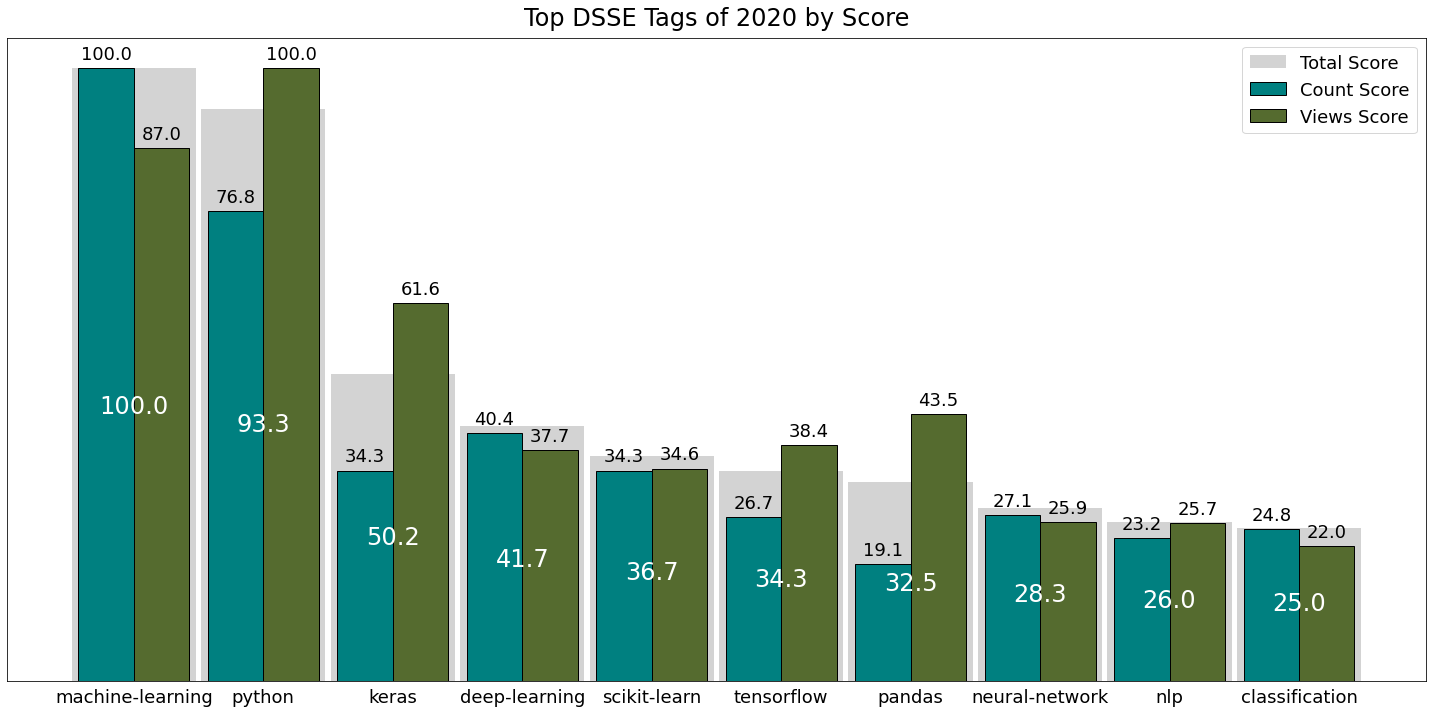

In [22]:
ind = np.arange(10)
width=(3/7)

fig, ax = plt.subplots(figsize=(20, 10))

total = ax.bar(ind, total_z[:10], 0.96, color='lightgrey', label="Total Score")
tags = ax.bar(ind-width/2, tags_z[:10], width, color='teal', edgecolor="black", label="Count Score")
views = ax.bar(ind+width/2, views_z[:10], width, color='DarkOliveGreen', edgecolor="black", label="Views Score")

ax.set_xticks(ind)
ax.set_title('Top DSSE Tags of 2020 by Score', fontsize=24, y=1.01)
ax.set_xticklabels(names[:10], fontsize=18)

ax.tick_params(axis="both", which="both", top=False, bottom=False, left=False, labelleft=False)

ax.legend(fontsize=18)

new_autolabel(tags)
new_autolabel(views)
new_autolabel(total, True)

fig.tight_layout()
plt.show()

Based on the total score of the values, machine-learning is still the most valueable topic to learn, with python as a close second. Notice that a few values (noteably keras and pandas) have increased their rankings considerably.

Note that you can compare the relevance of each tag to the other tags using these scores. In mathematical terms, for tags A and B:

\begin{align}
    \frac{Score_{A}}{Score_{B}} \approx \frac{1}{2}\left( \frac{TotalTags_{A}}{TotalTags_{B}} + \frac{TotalViews_{A}}{TotalViews_{B}} \right)
\end{align}

While this comparison isn't perfect because I adjusted the distributions slightly in order to make the values on a scale from 0 to 100, I will demonstrate a few examples to show the value of this approximation.

In [23]:
tag_metrics.iloc[[0, 1, 4, 7]]

,Count,Views
machine-learning,263,104873
python,202,120591
keras,91,74376
classification,66,26639


In [24]:
ml_vs_class_raw = round(((263 / 66) + (104873 / 26639)) / 2, 2)
ml_vs_class_score = round(100.0 / 25.0, 2)

ml_vs_python_raw = round(((263 / 202) + (104873 / 120591)) / 2, 2)
ml_vs_python_score = round(100.0 / 93.3, 2)

keras_vs_class_raw = round(((91 / 66) + (74376 / 26639)) / 2, 2)
keras_vs_class_score = round(50.2 / 25.0, 2)

raw_vs_score = pd.DataFrame([
    [ml_vs_class_raw, ml_vs_class_score],
    [ml_vs_python_raw, ml_vs_python_score],
    [keras_vs_class_raw, keras_vs_class_score]
])

raw_vs_score.columns = ["Actual", "Estimate"]
raw_vs_score

,Actual,Estimate
0,3.96,4.00
1,1.09,1.07
2,2.09,2.01


As seen by the table above, the approximation is close enough to make reasonable comparisons concerning the magnitude of the difference between the relevancy of certain tags. For example, machine-learning is approximately 4 times as relevant as classification because 100.0 / 25.0 = 4.0.

## 5. Determining How Frequently Tags Appear Together

Now that I have determined which data science topics are most relevant, I will now examine how frequently each of the top ten topics appear within the same questions. I will calculate the following using two separate techniques:
- The total number of questions that contain both tag A and B
- The percentage of questions that contain tag A that also contain tag B

### a) The Relationship Between Tags

First, I will create a dictionary that contains the top ten most relevant data science topics as keys. After I loop through the dictionary, the values for each of these keys will be another dictionary that contains the total number of questions the key tag shares with every other tag in the top ten.

In [25]:
relationships = {"machine-learning": {},
                 "python": {},
                 "deep-learning": {},
                 "scikit-learn": {},
                 "keras": {},
                 "neural-network": {},
                 "tensorflow": {},
                 "classification": {},
                 "nlp": {},
                 "pandas": {}
                }

for row in questions["Tags"]:
    tags = row.replace("><", " ").replace("<", "").replace(">", "").split(" ")
    for tag in tags:
        if tag in tag_names[:10]:
            for value in tags:
                if value in tag_names[:10]:
                    if value in relationships[tag]:
                        relationships[tag][value] += 1
                    else:
                        relationships[tag][value] = 1
        elif tag in tag_names[:10]:
            for value in tags:
                if value in tag_names[:10]:
                    relationships[tag][value] = 1

Next, I will convert the dictionary above into a pandas dataframe and display the dataframe as a table.

In [26]:
tag_relationships = pd.DataFrame.from_dict(relationships, orient='index').fillna(0).astype(int)
tag_relationships = tag_relationships.iloc[[*range(10)], [0, 1, 2, 4, 3, 7, 5, 6, 8, 9]] # reorders the columns so they match the order of the rows
tag_relationships

,machine-learning,python,deep-learning,scikit-learn,keras,neural-network,tensorflow,classification,nlp,pandas
machine-learning,263,59,54,29,18,25,15,24,12,4
python,59,202,12,39,24,6,20,9,7,34
deep-learning,54,12,107,0,21,32,17,6,7,0
scikit-learn,29,39,0,91,4,2,1,7,2,12
keras,18,24,21,4,91,15,34,2,1,0
neural-network,25,6,32,2,15,72,7,5,4,0
tensorflow,15,20,17,1,34,7,71,2,1,0
classification,24,9,6,7,2,5,2,66,2,1
nlp,12,7,7,2,1,4,1,2,62,1
pandas,4,34,0,12,0,0,0,1,1,51


Note that the values moving diagonally from the top left to the bottom right are instances in which the value appears with itself. Machine-learning and python appear together 59 times, more frequently than any other tag pair (that's not paired with itself).

However, since machine-learning and python are the most popular tags by a large margin, the fact that they appear together on many questions does not necessarily ensure the topics are strongly related. In order to determine the relationships' strength, I will create a new dictionary that converts the gross sum into a percentage of total.  

In [27]:
relative_relationships = {}

for tag in relationships:
    relative_relationships[tag] = {}
    for relation in relationships[tag]:
        temp_rel = round(relationships[tag][relation] * 100 / relationships[tag][tag], 1)
        relative_relationships[tag][relation] = temp_rel

In [28]:
rel_relationships = pd.DataFrame.from_dict(relative_relationships, orient='index').fillna(0).astype(float)
rel_relationships = rel_relationships.iloc[[*range(10)], [0, 1, 2, 4, 3, 7, 5, 6, 8, 9]]
rel_relationships

,machine-learning,python,deep-learning,scikit-learn,keras,neural-network,tensorflow,classification,nlp,pandas
machine-learning,100.0,22.4,20.5,11.0,6.8,9.5,5.7,9.1,4.6,1.5
python,29.2,100.0,5.9,19.3,11.9,3.0,9.9,4.5,3.5,16.8
deep-learning,50.5,11.2,100.0,0.0,19.6,29.9,15.9,5.6,6.5,0.0
scikit-learn,31.9,42.9,0.0,100.0,4.4,2.2,1.1,7.7,2.2,13.2
keras,19.8,26.4,23.1,4.4,100.0,16.5,37.4,2.2,1.1,0.0
neural-network,34.7,8.3,44.4,2.8,20.8,100.0,9.7,6.9,5.6,0.0
tensorflow,21.1,28.2,23.9,1.4,47.9,9.9,100.0,2.8,1.4,0.0
classification,36.4,13.6,9.1,10.6,3.0,7.6,3.0,100.0,3.0,1.5
nlp,19.4,11.3,11.3,3.2,1.6,6.5,1.6,3.2,100.0,1.6
pandas,7.8,66.7,0.0,23.5,0.0,0.0,0.0,2.0,2.0,100.0


This chart is more useful. For example, while machine-learning and python are paired togther most often, only 29.2% of python questions are also machine-learning questions. In contrast, 50.5% of questions involving deep-learning also involve machine-learning, indicating these two data science topics are more closely related.

### b) Displaying the Relationships Between Tags

While the two tables above are useful, it still takes some time to determine the strength of the relationship  between different tags. An excellent way to speed up the time in which a person can visualize the relationships between tags is to add color. Therefore, I will create a heatmap for each of the tables above.

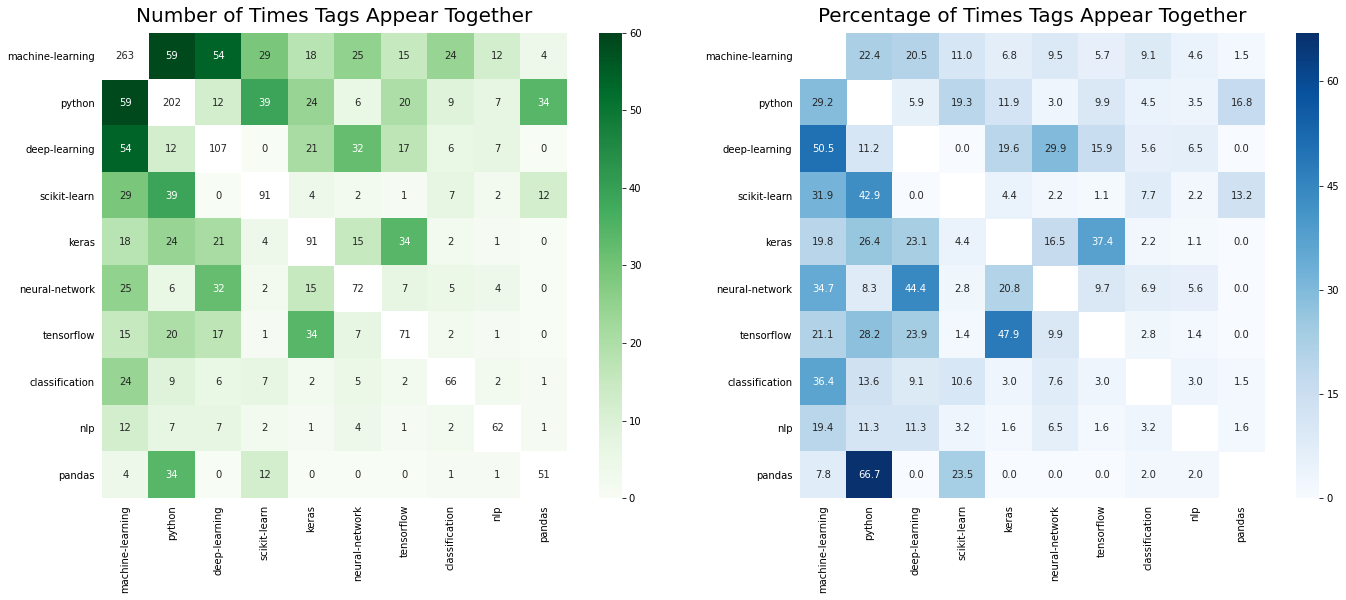

In [29]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(tag_relationships, mask=((tag_relationships > 60) | (tag_relationships == 51)), cmap="Greens", annot=True, square=True, fmt="d", vmax=60, ax=ax1)
sns.heatmap(tag_relationships, mask=((tag_relationships <= 60) & (tag_relationships != 51)), cmap="gray", annot=True, square=True, fmt="d", vmax=50, cbar=False, ax=ax1)

sns.heatmap(rel_relationships, mask=(rel_relationships > 70), cmap="Blues", annot=True, square=True, fmt=".1f", vmax=67, ax=ax2)

ax1.tick_params(axis="both", which="both", top=False, bottom=False, left=False)
ax2.tick_params(axis="both", which="both", top=False, bottom=False, left=False)
ax1.set_title("Number of Times Tags Appear Together", fontsize=20, y=1.01)
ax2.set_title("Percentage of Times Tags Appear Together", fontsize=20, y=1.01)

fig.tight_layout(pad=1)

plt.show()

These two heatmaps make it very easy to determine how strongly related the data science topics are to one another. For example, in the first heat map, it takes less than a second to realize that machine-learning and python share more questions than any other pair of topics. Similarly, in the second heatmap, the darkest blue square quickly catches the eye and indicates that the majority of pandas questions involve python (pandas is a python library, so technically 100% of pandas questions involve python).

Based on these heatmaps, it is paramount that anyone studying data science studies both machine-learning and python, as they are the two most popular subjects by a large margin. When deciding whether to specialize in a specific data science subfield, use the chart to determine which related skills you might also need to learn. For example, if a person wants to become an expert on neural networks, they should also study machine learning and deep learning (and potentially keras as well), as many neural network questions require knowledge on these topics.

## 6. Results

While this project will continue in part II of this project, a few conclusions can be made simply from examining the first part of the project. Part II will contain information about how data science topics have changed over time and relies on a different dataset.

After preparing the data, I analyzed two separate aspects of the data science tags in order help data scientist hopefuls determine which subjects to study:
- The most relevant data science subfields
- How closely intertwined subfields with the top ten are to one another

The most relevant data science topics (based on the scoring system I developed) are machine learning (100.0) and python (93.3) by a large margin. Basically, students should have a baseline knowledge of all the top ten subfields and then specialize in those areas they are most interested in.

It is useful to examine how interdependent data science subfields are so that it is easier to know which topics to study if a person is thinking about focusing on a given subfield. For example, if a student trying to learn more about tensorflow, knowing keras and python will be helpful as they are tagged in 47.9% and 28.2% of tensorflow questions respectively.